In [154]:
import pandas as pd

In [155]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [156]:
df = pd.read_csv("movies.csv")
print(df.columns)
df.head()

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Cole's Playground

In [157]:
df_movies = pd.read_csv("movies.csv")
df_imdb = pd.read_csv("imdb_movies.csv")

print(df_movies.columns)
print(f"Number instances: {df_movies.shape[0]}")
print(df_imdb.columns)
print(f"Number instances: {df_imdb.shape[0]}")

common_movies = []

for movie_1 in df_movies["name"]:
    for movie_2 in df_imdb["orig_title"]:
        if movie_1 == movie_2:
            common_movies.append(movie_1)

print(f"Number common movies: {len(common_movies)}")

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')
Number instances: 7668
Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')
Number instances: 10178
Number common movies: 4241


In [215]:
# df_merged.head()
df_slim = df_merged.drop(["released", "date_x", "overview", "status"], axis=1)
df_slim.head()

,name,rating,genre_x,year,score_x,votes,director,writer,star,country_x,budget,gross,company,runtime,names,score_y,genre_y,crew,orig_title,orig_lang,budget_x,revenue,country_y,rating_diff,rating_diff_abs
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,The Shining,8.2,"Horror, Thriller","Jack Nicholson, Jack Torrance, Shelley Duvall,...",The Shining,English,19000000.0,45613093.0,AU,0.2,0.2
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,The Blue Lagoon,6.2,"Romance, Adventure","Brooke Shields, Emmeline, Christopher Atkins, ...",The Blue Lagoon,English,4500000.0,47923795.0,AU,-0.4,0.4
2,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Airplane!,7.3,Comedy,"Robert Hays, Ted Striker, Julie Hagerty, Elain...",Airplane!,English,3500000.0,83453539.0,AU,0.4,0.4
3,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Caddyshack,6.6,Comedy,"Chevy Chase, Ty Webb, Rodney Dangerfield, Al C...",Caddyshack,English,6000000.0,39849764.0,AU,0.7,0.7
4,Friday the 13th,R,Horror,1980,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,Friday the 13th,6.4,Horror,"Betsy Palmer, Mrs. Voorhees, Adrienne King, Al...",Friday the 13th,English,17000000.0,92670237.0,AU,0.0,0.0


In [185]:
df_merged = pd.merge(df_movies, df_imdb, left_on="name", right_on="orig_title")
df_merged["score_y"] = df_merged["score_y"] / 10
df_merged["rating_diff"] = df_merged["score_x"] - df_merged["score_y"]
df_merged["rating_diff_abs"] = df_merged["rating_diff"].abs()
df_merged["rating_diff_abs"].describe()

count    4241.000000
mean        0.374841
std         0.500967
min         0.000000
25%         0.100000
50%         0.200000
75%         0.400000
max         7.600000
Name: rating_diff_abs, dtype: float64

In [158]:
for movie_title in common_movies[:5]:
    imdb_row = df_imdb[df_imdb["orig_title"] == movie_title].iloc[0]
    print(imdb_row)
    movie_row = df_movies[df_movies["name"] == movie_title].iloc[0]
    print(movie_row)

names                                               The Shining
date_x                                              11/13/1980 
score                                                      82.0
genre                                          Horror, Thriller
overview      Jack Torrance accepts a caretaker job at the O...
crew          Jack Nicholson, Jack Torrance, Shelley Duvall,...
orig_title                                          The Shining
status                                                 Released
orig_lang                                               English
budget_x                                             19000000.0
revenue                                              45613093.0
country                                                      AU
Name: 1912, dtype: object
name                          The Shining
rating                                  R
genre                               Drama
year                                 1980
released    June 13, 1980 (United Stat

# Data Analysis

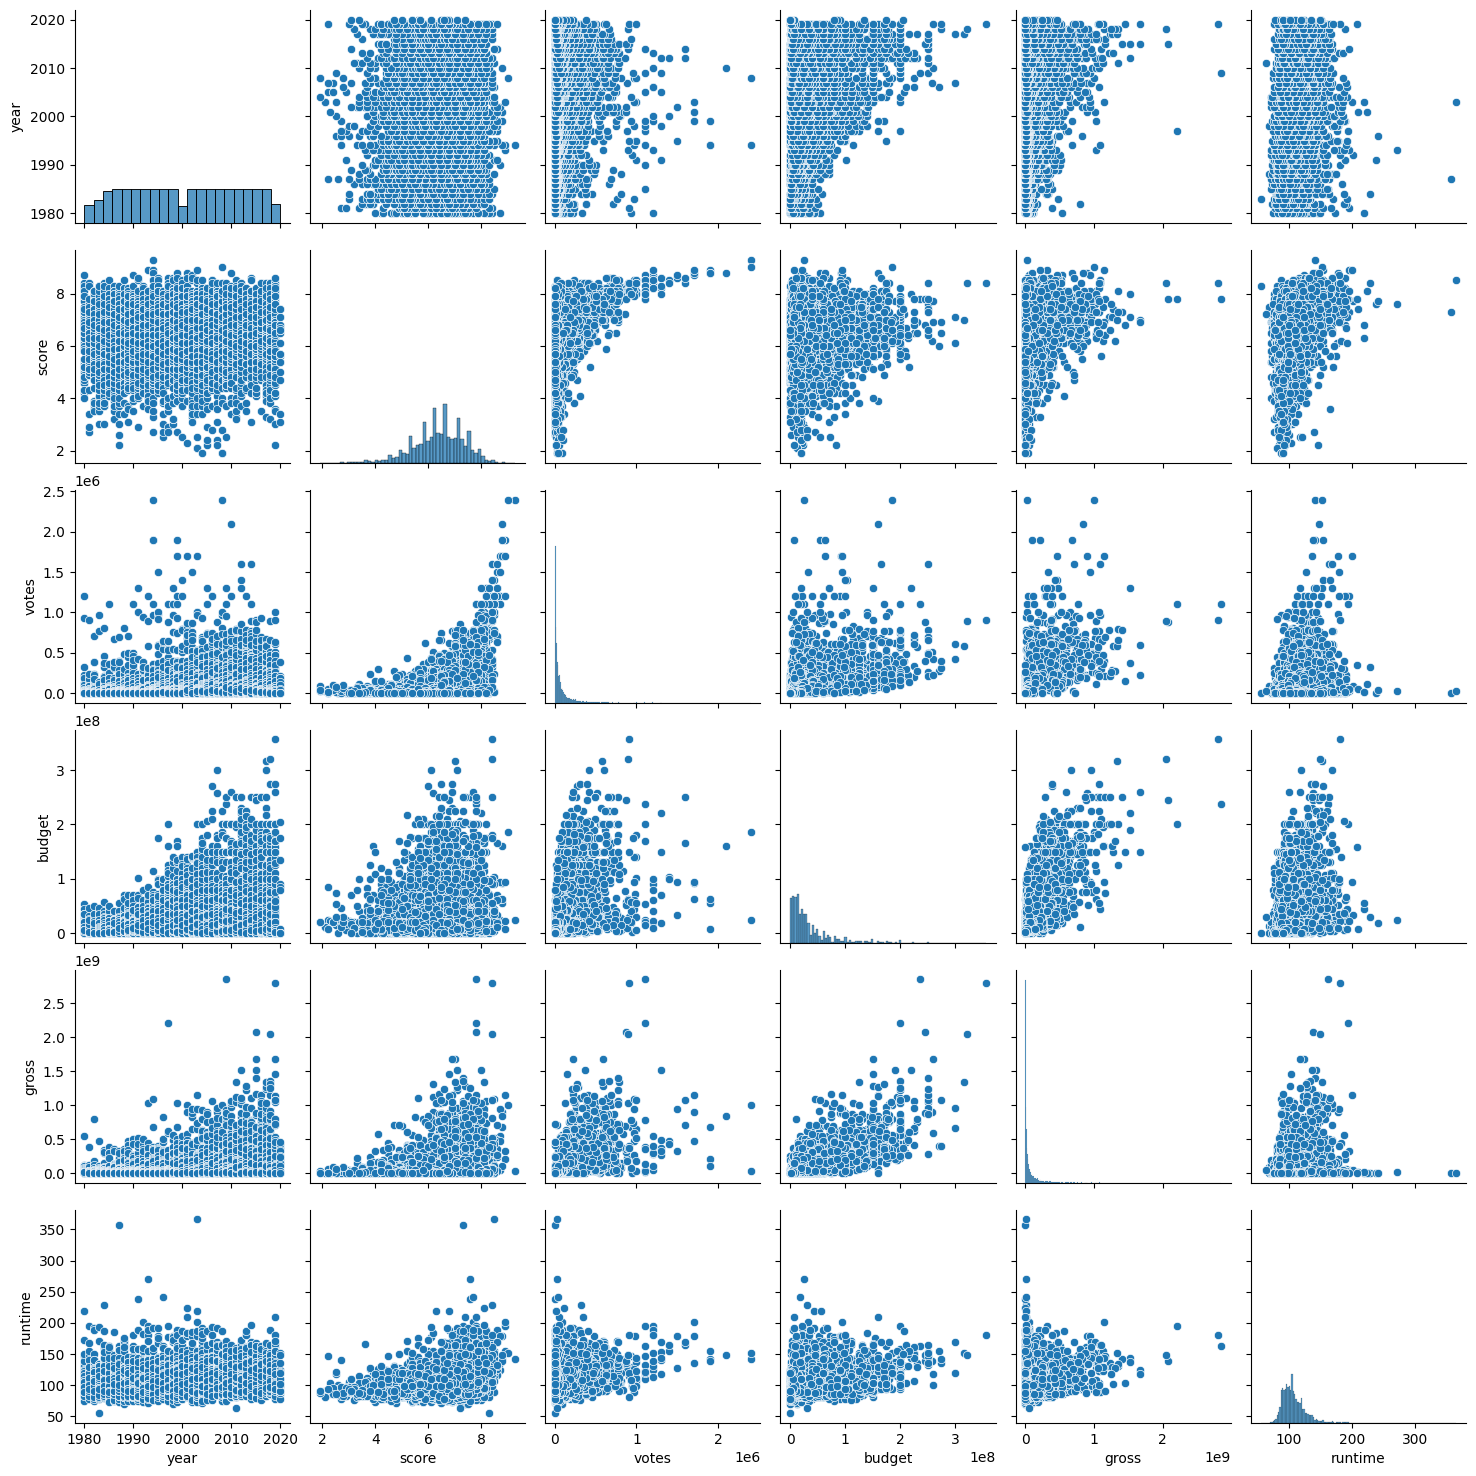

In [159]:
# plot pairplots
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

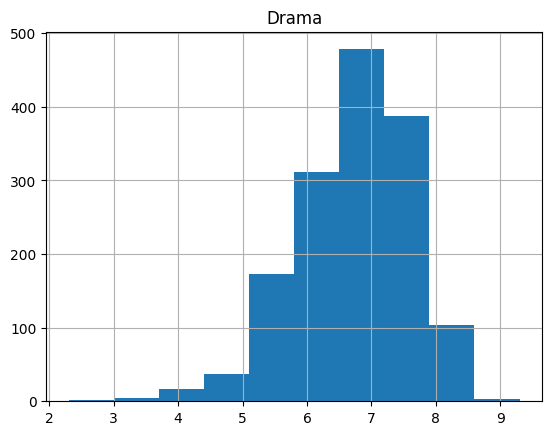

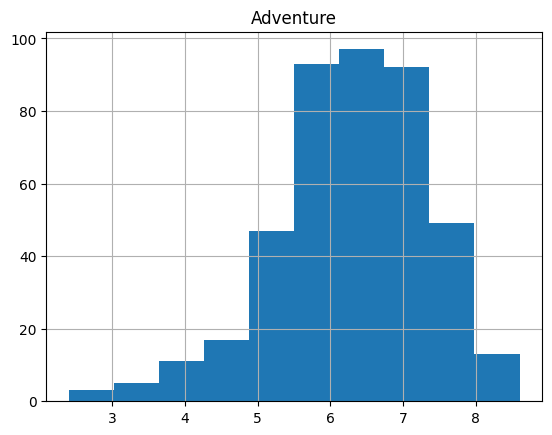

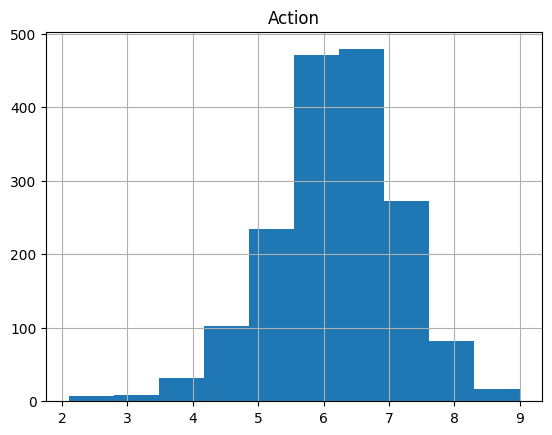

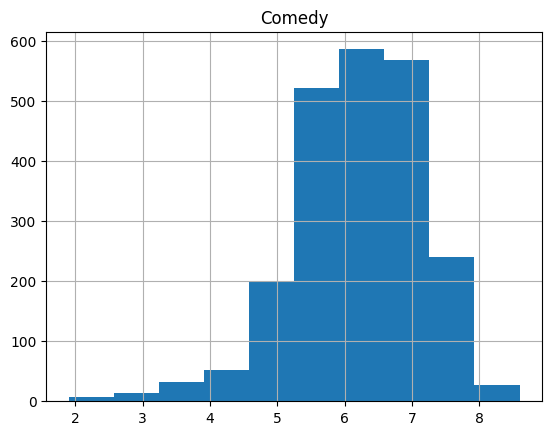

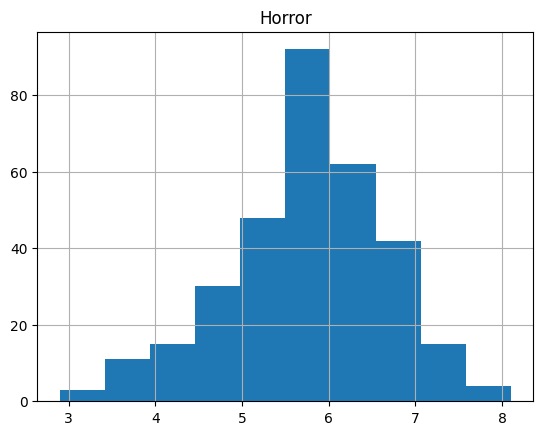

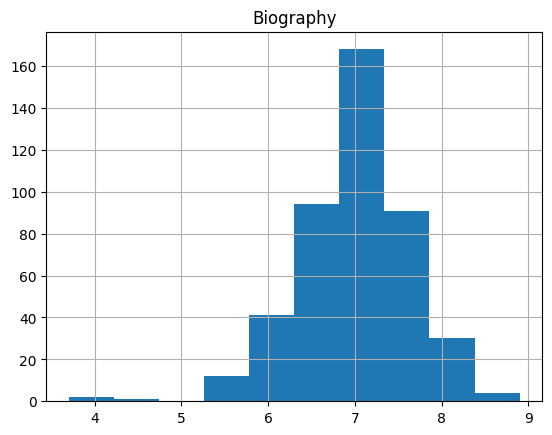

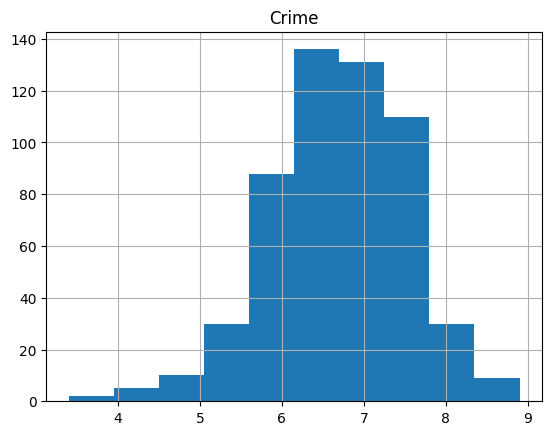

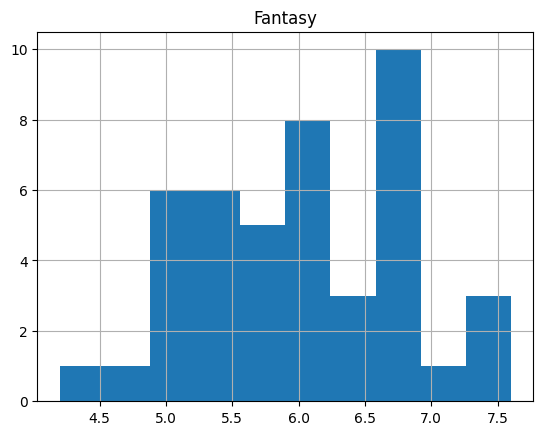

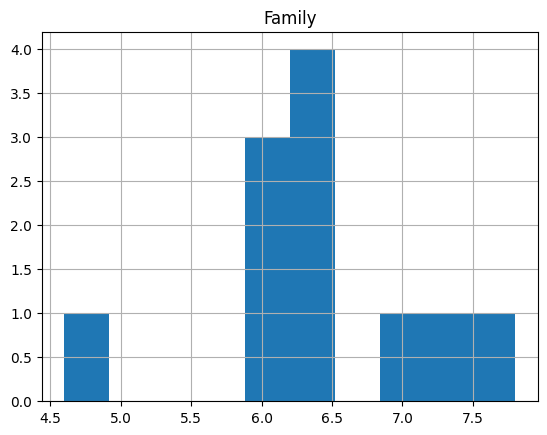

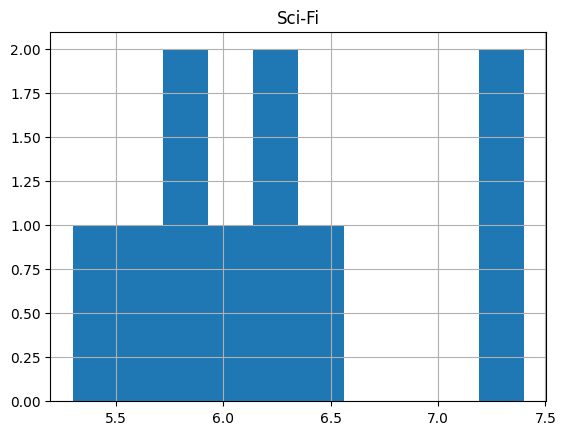

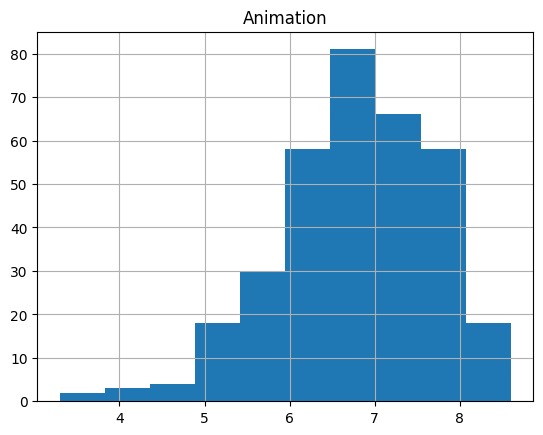

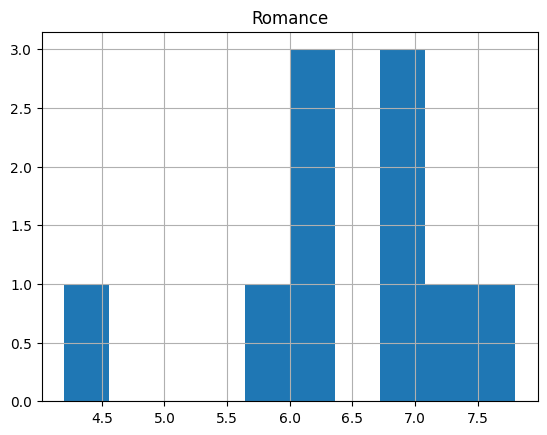

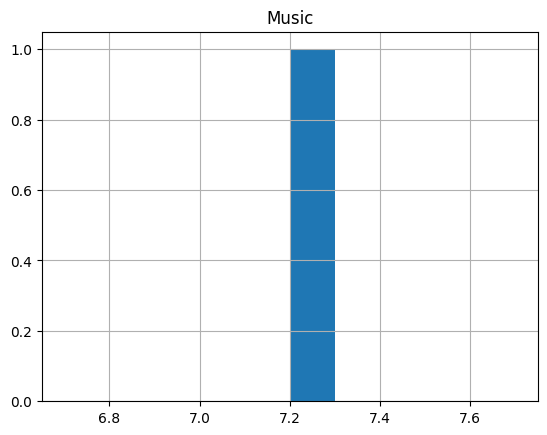

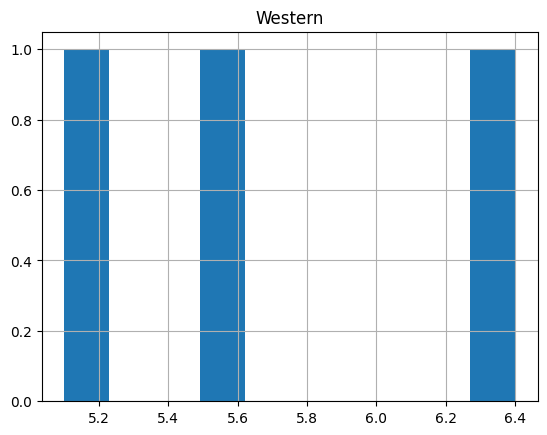

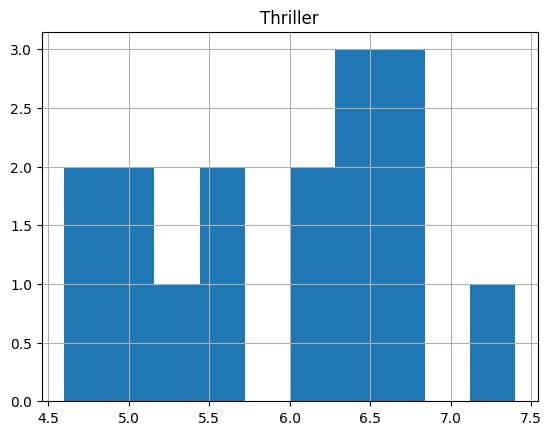

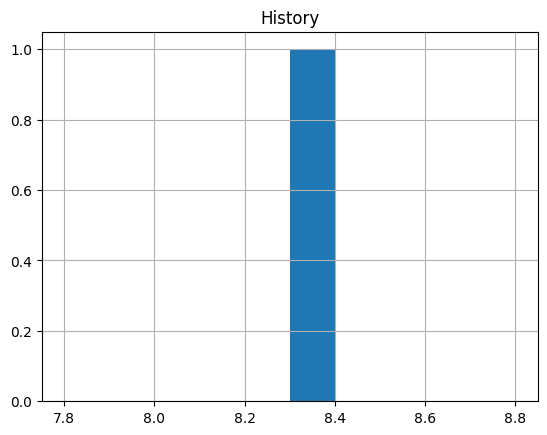

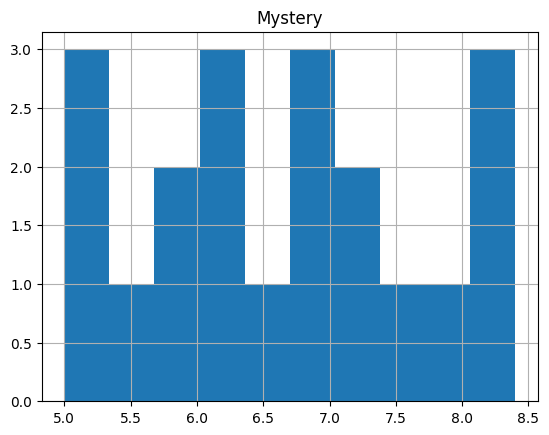

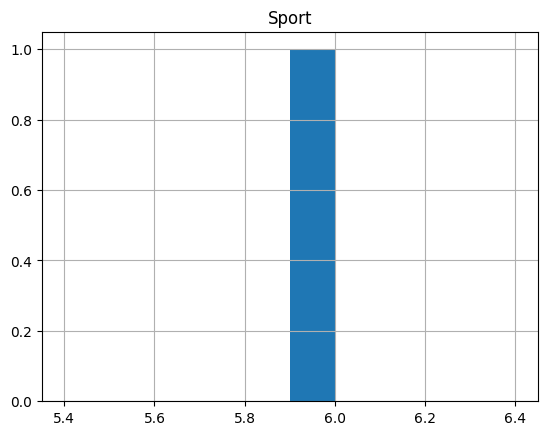

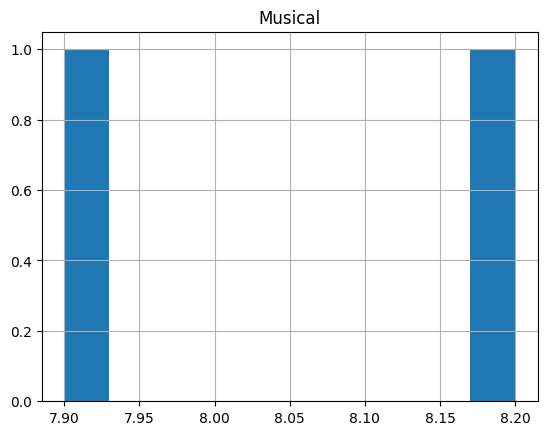

In [160]:
for category in df["genre"].unique():
    df[df["genre"] == category]["score"].hist()
    plt.title(category)
    plt.show()

In [161]:
# print number of items in each category sorted by count
df["genre"].value_counts()

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64

In [162]:
print(df.country.unique().shape)
df.country.value_counts()

(60,)


country
United States                     5475
United Kingdom                     816
France                             279
Canada                             190
Germany                            117
Australia                           92
Japan                               81
India                               62
Italy                               61
Spain                               47
Hong Kong                           45
Ireland                             43
China                               40
South Korea                         35
Denmark                             32
Sweden                              25
New Zealand                         25
Mexico                              22
Norway                              12
West Germany                        12
Netherlands                         12
Iran                                10
Switzerland                         10
Russia                               8
Belgium                              8
Argentina        

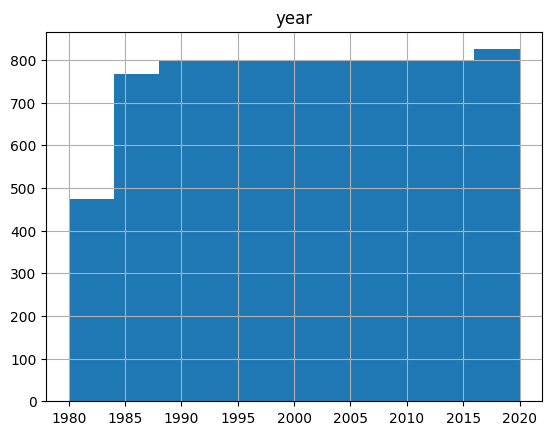

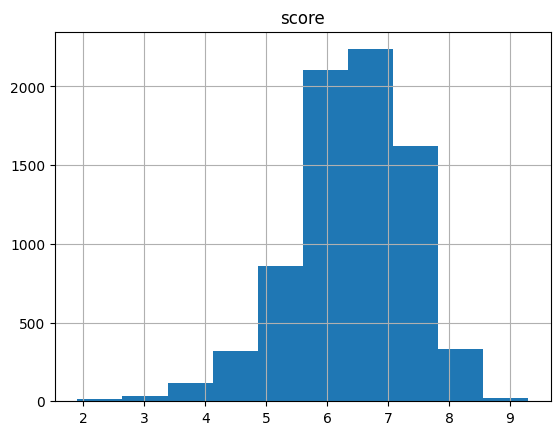

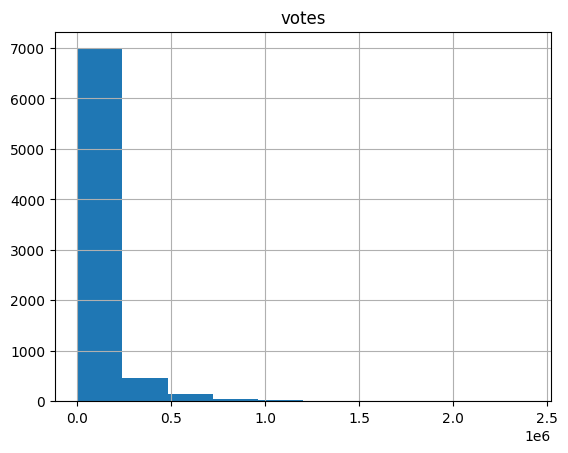

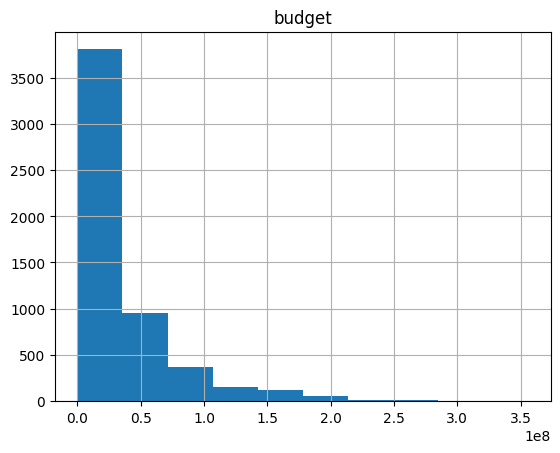

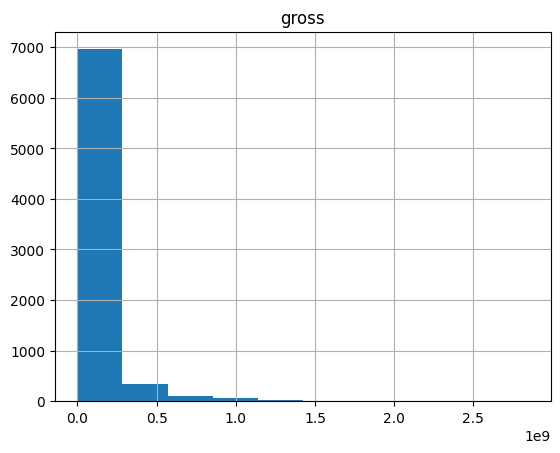

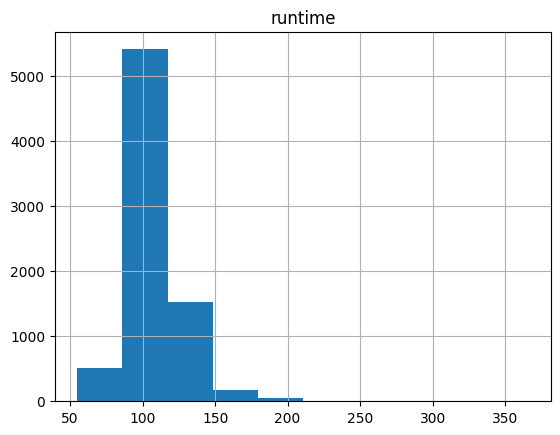

In [163]:
# plot histogram for each continuous variable
for col in df.columns:
    if df[col].dtype != "object":
        df[col].hist()
        plt.title(col)
        plt.show()

## Score

<Axes: >

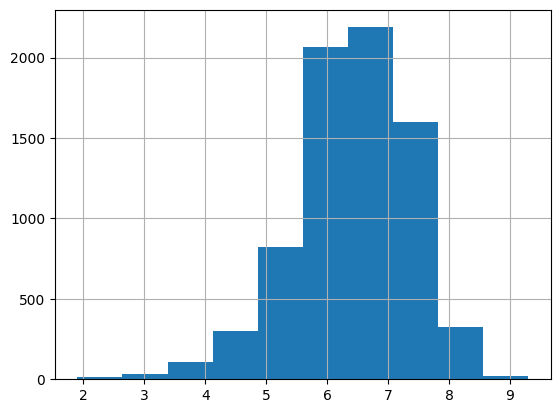

In [210]:
df.score.hist()

# Feature Selection

In [164]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Division of Labour

y = score

Mel
- name
- rating
- genre
- year

Kaleb
- director
- writer
- star
- country
  
Brynne
- budget
- company
- runtime

Maybe
- votes
- gross

In [165]:
# Mel
# - name
# - rating
# - genre
# - year

df = pd.get_dummies(df, columns=["rating", "genre"])

df["year"] = df["year"] - df["year"].min() / df["year"].max() - df["year"].min()

df["name_len"] = df["name"].apply(len)

In [166]:
import spacy


# TODO: fix for roman numerals
nlp = spacy.load("en_core_web_sm")


def has_number_like(input_string):
    doc = nlp(input_string)
    for token in doc:
        if token.like_num:
            return True
    return False


df["has_number"] = df["name"].apply(has_number_like)

In [167]:
df.iloc[[8]]

,name,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,rating_Approved,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-MA,rating_TV-PG,rating_Unrated,rating_X,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_Western,name_len,has_number
8,Superman II,-0.980198,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,11,False


In [168]:
# director

# keep only top 20 directors, all else will be unknown
top_directors = df["director"].value_counts().index[:20]
df.loc[~df["director"].isin(top_directors), "director"] = "Unknown"

In [169]:
# writer

# keep only top 20 writers, all else will be unknown
top_writers = df["writer"].value_counts().index[:20]
df.loc[~df["writer"].isin(top_writers), "writer"] = "Unknown"

In [170]:
# star

# keep only top 20 writers, all else will be unknown
top_stars = df["star"].value_counts().index[:20]
df.loc[~df["star"].isin(top_stars), "star"] = "Unknown"

In [171]:
# one hot

df = pd.get_dummies(df, columns=["director", "writer", "star", "country"])

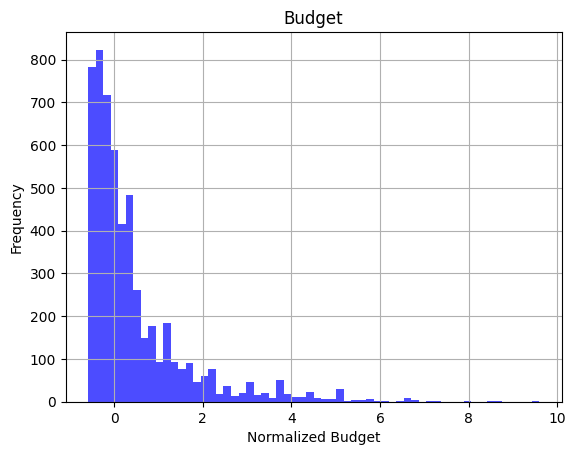

In [172]:
# budget
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Fit and transform data
df["budget"] = scaler.fit_transform(df["budget"].values.reshape(-1, 1))


def plot_histogram(data_feature, title, x_label, y_label):
    plt.hist(data_feature, bins=60, color="blue", alpha=0.7)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()


plot_histogram(df["budget"], "Budget", "Normalized Budget", "Frequency")

In [173]:
# company

# keeping top 30 companies
if df["company"].nunique() > 30:
    top_companies = df["company"].value_counts().index[:30]
    df.loc[~df["company"].isin(top_companies), "company"] = "Unknown"

df = pd.get_dummies(df, columns=["company"])

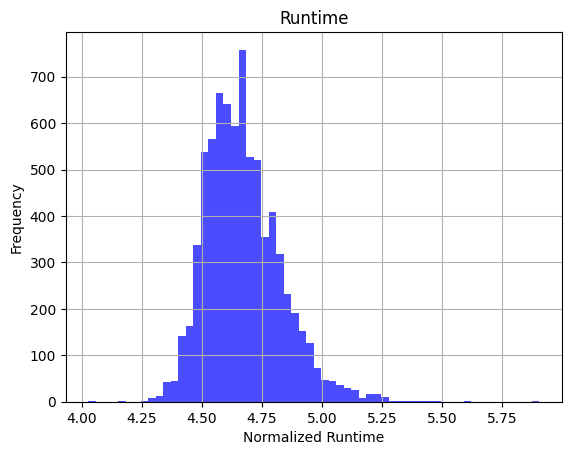

In [174]:
# runtime
df["runtime"] = np.log(df["runtime"] + 1)
plot_histogram(df["runtime"], "Runtime", "Normalized Runtime", "Frequency")

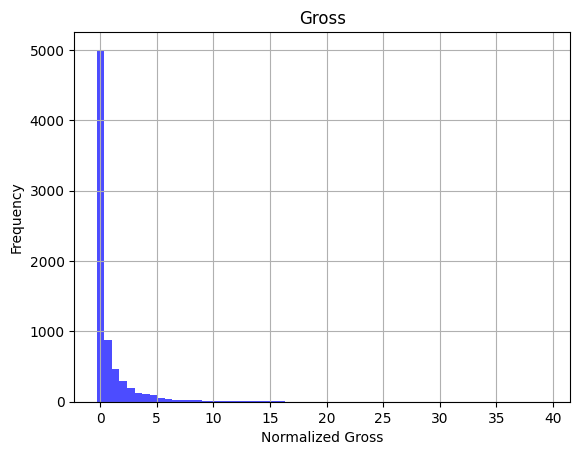

In [175]:
# gross

# Fit and transform data
df["gross"] = scaler.fit_transform(df["gross"].values.reshape(-1, 1))
plot_histogram(df["gross"], "Gross", "Normalized Gross", "Frequency")

# Train, test, split

In [176]:
len(df.columns)

194

In [177]:
df.head()

,name,year,released,score,votes,budget,gross,runtime,rating_Approved,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-MA,rating_TV-PG,rating_Unrated,rating_X,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_Western,name_len,has_number,director_Barry Levinson,director_Brian De Palma,director_Clint Eastwood,director_Directors,director_Garry Marshall,director_Joel Schumacher,director_Martin Scorsese,director_Oliver Stone,director_Richard Linklater,director_Ridley Scott,director_Robert Zemeckis,director_Ron Howard,director_Sidney Lumet,director_Spike Lee,director_Stephen Frears,director_Steven Soderbergh,director_Steven Spielberg,director_Tim Burton,director_Unknown,director_Walter Hill,director_Woody Allen,writer_David Mamet,writer_Jim Jarmusch,writer_Joel Coen,writer_John Hughes,writer_John Logan,writer_Kevin Smith,writer_Lars von Trier,writer_Lawrence Kasdan,writer_Leigh Whannell,writer_Luc Besson,writer_M. Night Shyamalan,writer_Michael Crichton,writer_Pedro Almodóvar,writer_Quentin Tarantino,writer_Robert Rodriguez,writer_Stephen King,writer_Tyler Perry,writer_Unknown,writer_Wes Craven,writer_William Shakespeare,writer_Woody Allen,star_Adam Sandler,star_Arnold Schwarzenegger,star_Ben Stiller,star_Bruce Willis,star_Denzel Washington,star_Eddie Murphy,star_Harrison Ford,star_Jeff Bridges,star_John Travolta,star_Johnny Depp,star_Keanu Reeves,star_Kevin Costner,star_Mel Gibson,star_Nicolas Cage,star_Robert De Niro,star_Robin Williams,star_Steve Martin,star_Sylvester Stallone,star_Tom Cruise,star_Tom Hanks,star_Unknown,country_Argentina,country_Aruba,country_Australia,country_Austria,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Federal Republic of Yugoslavia,country_Finland,country_France,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Kenya,country_Lebanon,country_Libya,country_Malta,country_Mexico,country_Netherlands,country_New Zealand,country_Norway,country_Panama,country_Philippines,country_Poland,country_Portugal,country_Republic of Macedonia,country_Romania,country_Russia,country_Serbia,country_South Africa,country_South Korea,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_United Arab Emirates,country_United Kingdom,country_United States,country_Vietnam,country_West Germany,country_Yugoslavia,company_Alcon Entertainment,company_BBC Films,company_Castle Rock Entertainment,company_Columbia Pictures,company_Dimension Films,company_DreamWorks Animation,company_Dreamworks Pictures,company_Focus Features,company_Fox 2000 Pictures,company_Fox Searchlight Pictures,company_Hollywood Pictures,company_Lionsgate,company_Metro-Goldwyn-Mayer (MGM),company_Miramax,company_Morgan Creek Entertainment,company_New Line Cinema,company_New Regency Productions,company_Orion Pictures,company_Paramount Pictures,company_Revolution Studios,company_Screen Gems,company_Summit Entertainment,company_The Weinstein Company,company_Touchstone Pictures,company_TriStar Pictures,company_Twentieth Century Fox,company_United Artists,company_Universal Pictures,company_Unknown,company_Walt Disney Pictures,company_Warner Bros.
0,The Shining,-0.980198,"June 13, 1980 (United States)",8.4,927000.0,-0.042857,0.374808,4.990433,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [191]:
# rows with nan
df.isna().sum()
# replace budget nan with median
df["budget"].fillna(df["budget"].median(), inplace=True)
# runtime nan with median
df["runtime"].fillna(df["runtime"].median(), inplace=True)

# drop score nan
df.dropna(inplace=True)

In [203]:
from sklearn.model_selection import train_test_split

X = df.drop(
    [
        "name",
        "score",
        "released",
        "votes",
        "budget",
    ],
    axis=1,
)
y = df["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models

In [204]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)

In [209]:
pred = regressor.predict(X_test)


# Evaluate 

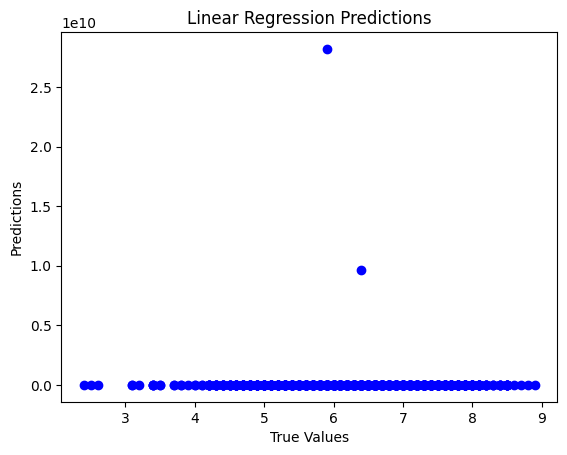

In [208]:
def plot_predictions(y_test, y_pred):
    plt.scatter(y_test, y_pred, color="blue")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Linear Regression Predictions")
    plt.show()

pred = regressor.predict(X_test)
plot_predictions(y_test, pred)

In [213]:
# score
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))

Mean squared error: 593633575688922752.00
Coefficient of determination: -653145224472397440.00


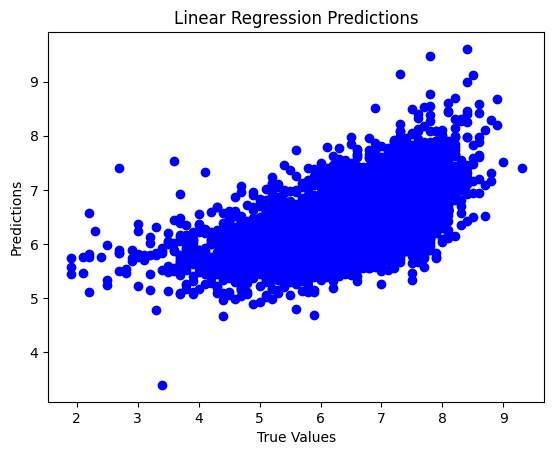

In [211]:
train_pred = regressor.predict(X_train)
plot_predictions(y_train, train_pred)